In [1]:
import pandas as pd
import numpy as np
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cancer_df = pd.read_csv("Prostate_Cancer.csv")

In [3]:
cancer_df.shape

(100, 10)

In [4]:
cancer_df.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [5]:
cancer_df.head(5)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [6]:
# Removing the id column as it has unique values and doesnot determine the cancer.
cancer_df = cancer_df.iloc[:,1:]

In [7]:
cancer_df.head(5)

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [8]:
cancer_df.isnull().sum()

diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [9]:
cancer_df['diagnosis_result'].value_counts()

M    62
B    38
Name: diagnosis_result, dtype: int64

In [10]:
cancer_df['diagnosis_result'].replace(('M', 'B'), (1, 0), inplace=True)

In [11]:
cancer_df['diagnosis_result'][:5]

0    1
1    0
2    1
3    1
4    1
Name: diagnosis_result, dtype: int64

In [12]:
def normalizefun(col):
    return ((col - min(col)) / (max(col) - min(col)))

In [13]:
cancer_df.iloc[:,1:].apply(normalizefun)

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,0.8750,0.0625,0.825000,0.448687,1.000000,0.781759,0.633136,0.590909
1,0.0000,0.1250,0.675000,0.670644,1.000000,0.133550,0.272189,0.090909
2,0.7500,1.0000,0.650000,0.597255,0.753425,0.397394,0.426036,0.159091
3,0.3125,0.3125,0.216667,0.109785,0.000000,0.801303,0.739645,1.000000
4,0.0000,0.5000,0.691667,0.653341,0.972603,0.309446,0.272189,0.136364
5,1.0000,0.8750,0.258333,0.164081,0.794521,0.429967,0.437870,0.522727
6,0.4375,0.9375,0.566667,0.500000,0.342466,0.231270,0.260355,0.090909
7,0.3750,0.4375,0.316667,0.224344,0.671233,0.413681,0.502959,0.500000
8,0.6250,0.8125,0.300000,0.189737,0.780822,0.504886,0.591716,0.477273
9,1.0000,0.0000,0.266667,0.163484,0.671233,0.657980,0.402367,0.659091


In [14]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X = cancer_df.iloc[:,1:]
Y = cancer_df.iloc[:,0]


In [15]:
Y.head(5)

0    1
1    0
2    1
3    1
4    1
Name: diagnosis_result, dtype: int64

In [16]:
X.head(5)

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059


In [17]:
validation_size = 0.34
X_train, X_Validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=0)


In [18]:
X_train.shape

(66, 8)

In [19]:
X_Validation.shape

(34, 8)

In [20]:
Y_train.shape

(66,)

In [21]:
Y_validation.shape

(34,)

In [22]:
knn_model = KNeighborsClassifier(n_neighbors = 10, weights='uniform' )
knn_model.fit(X_train,Y_train)
pred = knn_model.predict(X_Validation)

In [23]:
pred.shape

(34,)

In [24]:
a = accuracy_score(Y_validation, pred)
print("Accuracy of the model is ", + a)

Accuracy of the model is  0.8529411764705882


In [25]:
 cm=confusion_matrix(Y_validation, pred)

In [26]:
cm

array([[ 9,  1],
       [ 4, 20]], dtype=int64)

In [27]:
knn_model = KNeighborsClassifier(n_neighbors = 9, weights='uniform' )
knn_model.fit(X_train,Y_train)
pred = knn_model.predict(X_Validation)

In [28]:
a = accuracy_score(Y_validation, pred)
print("Accuracy of the model is ", + a)

Accuracy of the model is  0.7941176470588235


In [29]:
 cm=confusion_matrix(Y_validation, pred)

In [30]:
cm

array([[ 6,  4],
       [ 3, 21]], dtype=int64)

In [31]:
knn_model = KNeighborsClassifier(n_neighbors = 12, weights='uniform' )
knn_model.fit(X_train,Y_train)
pred = knn_model.predict(X_Validation)
a = accuracy_score(Y_validation, pred)
print("Accuracy of the model is ", + a)

Accuracy of the model is  0.8235294117647058


In [32]:
cm=confusion_matrix(Y_validation, pred)
cm

array([[ 9,  1],
       [ 5, 19]], dtype=int64)

In [33]:
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [34]:
print(TPR,TNR,PPV,NPV,FPR,FNR,FDR,ACC)

0.7916666666666666 0.9 0.95 0.6428571428571429 0.1 0.20833333333333334 0.05 0.8235294117647058


In [35]:
print(classification_report(Y_validation, pred))
k_list = list(range(1,50))
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = model_selection.cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
print(pred)

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.95      0.79      0.86        24

   micro avg       0.82      0.82      0.82        34
   macro avg       0.80      0.85      0.81        34
weighted avg       0.86      0.82      0.83        34

[1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0]


In [36]:
MSE = [1 - x for x in cv_scores]
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 37.


In [37]:
knn_model = KNeighborsClassifier(n_neighbors = 37, weights='uniform' )
knn_model.fit(X_train,Y_train)
pred = knn_model.predict(X_Validation)
a = accuracy_score(Y_validation, pred)
print("Accuracy of the model is ", + a)

Accuracy of the model is  0.8235294117647058


In [38]:
# The accuracy of the model can be still imporved by selecting set of features or by using algorithms by decision trees and Random forests


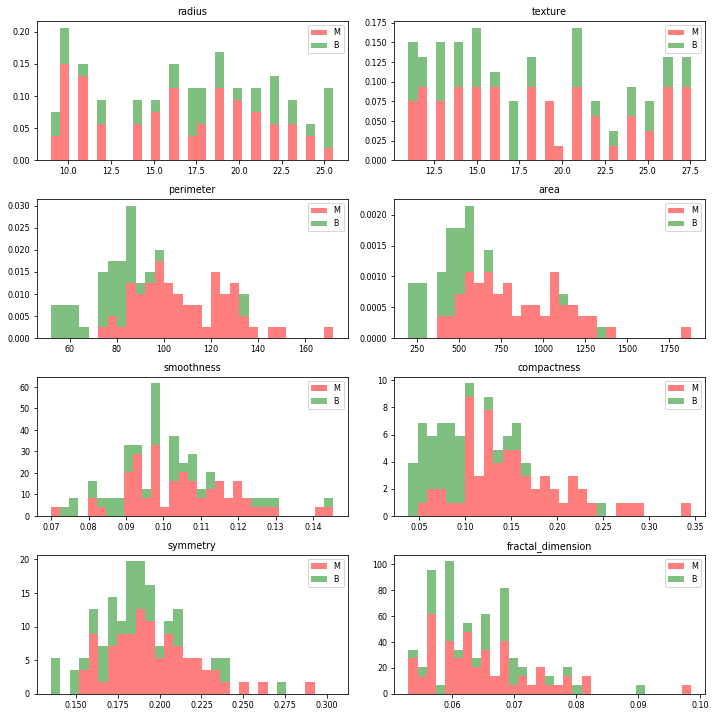

In [56]:
features_mean=list(cancer_df.columns[1:9])
# split dataframe into two based on diagnosis
dfM=cancer_df[cancer_df['diagnosis_result'] ==1]
dfB=cancer_df[cancer_df['diagnosis_result'] ==0]
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(cancer_df[features_mean[idx]]) - min(cancer_df[features_mean[idx]]))/30
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(cancer_df[features_mean[idx]]), max(cancer_df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

In [57]:
from sklearn.ensemble import RandomForestClassifier


In [58]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
rfc_predict = rfc.predict(X_Validation)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [59]:
rfc.score(X_Validation,Y_validation)

0.8529411764705882

In [62]:
predictor_var = X_train.columns
featureimp = pd.Series(rfc.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featureimp)

area                 0.272331
compactness          0.196300
perimeter            0.189154
smoothness           0.109302
symmetry             0.084274
fractal_dimension    0.059958
radius               0.053911
texture              0.034770
dtype: float64


In [69]:
Imp_Features = ['area','compactness','perimeter','smoothness','symmetry']
data = cancer_df[Imp_Features]
Xdata_train,Xdata_test,Y_train,Y_test = train_test_split(data,Y, test_size=validation_size, random_state=0)
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)
rfc.fit(Xdata_train,Y_train)
rfc_predict = rfc.predict(Xdata_test)

In [71]:
rfc.score(Xdata_test,Y_test)

0.9117647058823529

In [74]:
print("Train Accuracy :: ", accuracy_score(Y_train,rfc.predict(Xdata_train)))
print("Test Accuracy  :: ", accuracy_score(Y_test, rfc_predict))

Train Accuracy ::  0.8787878787878788
Test Accuracy  ::  0.9117647058823529


In [75]:
print(confusion_matrix(Y_test, rfc_predict))

[[ 8  2]
 [ 1 23]]


In [79]:
for i in range(0,20):
    print("Actual outcome :: {} and Predicted outcome :: {}".format(list(Y_test)[i], rfc_predict[i]))

Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1


In [94]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,random_state=6, shuffle=True)
error = []
for train, test in kf.split(X):
       # Filter training data
    train_predictors = (cancer_df[Imp_Features].iloc[train,:])
    # The target we're using to train the algorithm.
    train_target = Y.iloc[train]
    # Training the algorithm using the predictors and target.
    rfc.fit(train_predictors, train_target)
    #Record error from each cross-validation run
    error.append(rfc.score(cancer_df[Imp_Features].iloc[test,:], Y.iloc[test]))
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

Cross-Validation Score : 85.000%
Cross-Validation Score : 85.000%
Cross-Validation Score : 83.333%
Cross-Validation Score : 86.250%
Cross-Validation Score : 86.000%


#### The Random Forest Algorithm shows 91% accuracy with cross validation score of 86%, with KNN it is 82%. so Random Forest Algorithm is better compared to KNN